<h1><center>Liczba możliwych ruchów hetmana na szachownicy</center></h1>

<h2> Problem</h2>

<strong>Podaj liczbę pól, na które może przesunąć się hetman z pola o współrzędnych $(w, k)$ na szachownicy o wymiarach $n\times n$?</strong>

Hetamn jest najsilniejszą figurą w szachach mogąca poruszać się w dowolymu kierunku (poziomo, pionowo oraz na ukos) o dowolną lczbę wolnych pól. Na poniższej gafice przedstawiam przykładową szachownica o wymiarach $8\times8$ z hetmanem na polu o współrzędnych $(3, 3)$. Niebieskimi kropkami zaznaczone zostały możliwe ruchy hetmana.  

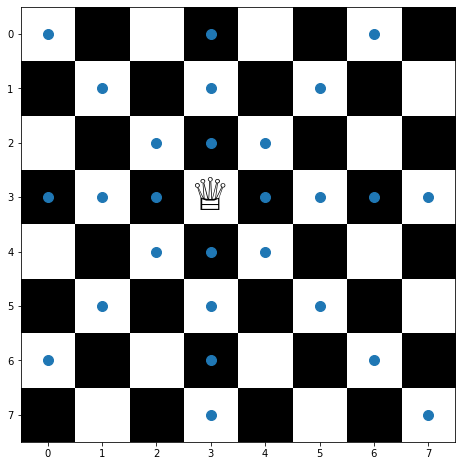

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plotChessboard(p, n):
    chessboard = np.zeros((n, n))
    chessboard[1::2, 0::2] = 1
    chessboard[0::2, 1::2] = 1

    fig, ax = plt.subplots(figsize=(n, n))

    plt.imshow(chessboard, cmap='binary')
    x = []
    y = []
    
    for i in range(n):
        if i != p[0]:
            x.append(i)
            y.append(p[1])
        if i != p[1]:
            x.append(p[0])
            y.append(i)

        if i > 0:
            if i + p[0] < n and i + p[1] < n:
                x.append(i + p[0])
                y.append(i + p[1])
            if p[0] - i >= 0 and p[1] - i >= 0:
                x.append(p[0] - i)
                y.append(p[1] - i)
            if i + p[0] < n and p[1] - i >= 0:
                x.append(p[0] + i)
                y.append(p[1] - i)
            if  p[0] - i >= 0 and p[1] + i < n:
                x.append(p[0] - i)
                y.append(p[1] + i)
    
    plt.scatter(x, y, s=100)

    if p[0] % 2 == p[1] % 2:
        color = 'black'
    else:
        color = 'white'
    plt.text(p[0] - 0.4, p[1], u"\u2655", fontsize=45, verticalalignment='center', color=color)

plotChessboard((3, 3), 8)
plt.show()

Zliczając niebieskie kropki, otrzymamy liczbę możliwych ruchów hetmana. Jest ich łącznie 27. Poniżej przedstawiam jeszcze jedną szachownicę tym razem z hetmanem na pozycji $(2, 3)$. Liczba możliwych ruchów w przypadku tego układu wynosi 25. Istotne co tutaj trzeba zauważyć to, że liczba możliwych ruchów uległa zmianie wyłacznie na skosach. Liczba ruchów poziomo i pionowo pozostaje bez zmian ze względu na położenie hetmana i zawsze wynosi $2(n-1)$.

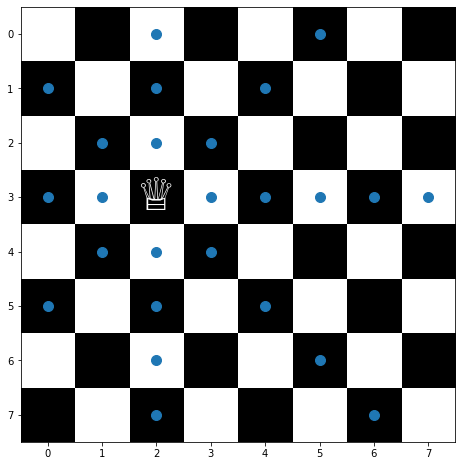

In [2]:
plotChessboard((2, 3), 8)
plt.show()

Następną rzeczą, która ułatwi budowę algorytmu jest zaobserowanie, że łączna liczba możliwch ruchów hetmana po skosach jest taka sama na zaznaczonych kwadratach. Poczynając od największego do najmniejszego liczba ruchów jakie może wykonać hetman po skosach wynosi odpowiedno 7, 9, 11, 13.

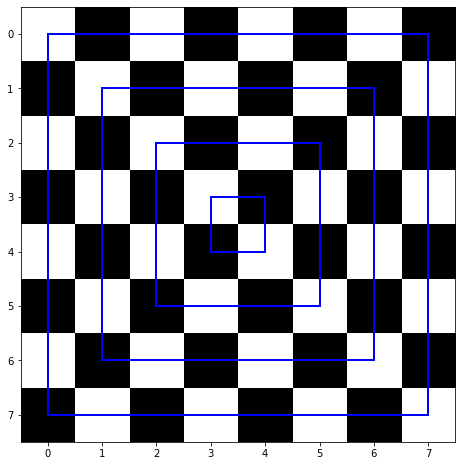

In [3]:
import matplotlib.patches as pat

def plotChessboardRect(n):
    chessboard = np.zeros((n, n))
    chessboard[1::2, 0::2] = 1
    chessboard[0::2, 1::2] = 1

    fig, ax = plt.subplots(figsize=(n, n))

    plt.imshow(chessboard, cmap='binary')
  
    for i in range(n//2):
        rect = pat.Rectangle((i, i), n - 2*i - 1, n - 2*i - 1, fill=False, linewidth=2, edgecolor='b')
        ax.add_patch(rect)

plotChessboardRect(8)

Wraz z każdym polem bliżej środka liczba możliwych ruchów wrasta o dwa. Niech $d$ oznacza najmniejszą odległość od któregokolwiek brzegu szachownicy wtedy liczba ruchów hetmana po skosach możemy wyrazić wzorem $n + 2d - 1$. Odległość $d$ możemy wyznaczyć jako minimum z wartości $w, k, n - w - 1, n - k - 1$. Mam już wszystkie niezbędne składniki do wyznaczenia wzoru na ilość ruchów hetmana. Ostateczny wzór ma postać

$$2(n-1) + n - 2d - 1 = 3(n - 1) + 2d = 3(n-1) + 2\min\{w, k, n-w-1, n-k-1\}.$$

Poniżej przedstawiam przykładową implementację powyższego wzoru.

In [4]:
from ipywidgets import interact, IntSlider

@interact(k=IntSlider(min=0, max=10, step=1, value=5),
          w=IntSlider(min=0, max=10, step=1, value=5),
          n=IntSlider(min=1, max=10, step=1, value=5))
def liczbaRuchowHetmana(k, w, n):
    d = min(w, k, n - w - 1, n - k - 1)
    return 3*(n - 1) + 2*d



interactive(children=(IntSlider(value=5, description='k', max=10), IntSlider(value=5, description='w', max=10)…